# First importing libraries and changing the classification of probabilities

In [75]:
# needed libraries

import os, cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [76]:
# Function from the main repo

def load_cell_image(fname):
    with Image.open(fname) as image:
        return np.asarray(image)
        
def load(fname='labels.csv'):
    data = np.genfromtxt(fname, dtype=['|S19', 'f8', '|S4'], names=[
                         'path', 'probability', 'type'])
    image_fnames = np.char.decode(data['path'])
    probs = data['probability']
    types = np.char.decode(data['type'])
    
    
    dir = os.path.dirname(fname)

    images = np.array([load_cell_image(os.path.join(dir, fn))
                       for fn in image_fnames])
    
    return images, probs, types

In [94]:
# importing images_names and data from labels.csv file

images_names = [image for image in os.listdir('images')]
images, probs, types = load('labels.csv')

In [83]:
# converting the probabilities into 2 classes
# (0,0.33) = 0
# (0.66 ,1) = 1

probs[(probs >= 0) & (probs < 0.34)] = 0
probs[(probs > 0.65) & (probs <= 1)] = 1

# This Part is only for splitting the data in folders

In [84]:
# a for 0, b for 1
i = 0
j = 0
for name, prob in zip(images_names, probs):
    name = 'images/'+name
    if prob == 0.0:
        i += 1
        os.rename(name, 'Data/' + f'a{i}' + '.png')
    elif prob == 1.0:
        j += 1
        os.rename(name, 'Data/' + f'b{j}' + '.png')

In [85]:
src = 'Data'
dsta = 'Data/Class A'
dstb = 'Data/Class B'

for file in os.listdir('Data'):
    src_path = os.path.join(src, file)
    if str(file)[0] == 'a':
        dst_path = os.path.join(dsta, file)
        os.rename(src_path, dst_path)
    elif str(file)[0] == 'b':
        dst_path = os.path.join(dstb, file)
        os.rename(src_path, dst_path)

In [104]:
import splitfolders
splitfolders.ratio('Data', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 2624 files [00:02, 1035.18 files/s]


# Here we continue working 

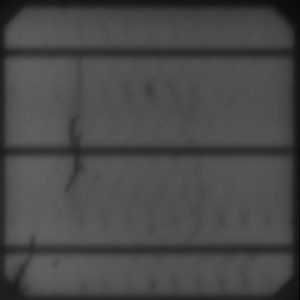

In [40]:
# showing one picture

im = Image.fromarray(images[0])
im

In [125]:
# function for showing images

def imshow(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    

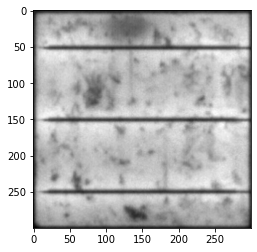

In [172]:
# now preparing the pictures to be in the same size and gray color

newsize = (300, 300)
for i in range(len(images)):
    img = Image.fromarray(images[i])
    images[i] = img.resize(newsize)
    
#imshow(img)

In [143]:
df = pd.DataFrame()
df['Images_names'] = images_names
df['Types'] = types
df['images'] = list(images)
df['Probabilities'] = probs

df

,Images_names,Types,images,Probabilities
0,cell0001.png,mono,"[[14, 14, 14, 15, 16, 17, 17, 17, 17, 17, 17, ...",1.0
1,cell0002.png,mono,"[[29, 29, 29, 28, 28, 29, 29, 29, 28, 29, 29, ...",1.0
2,cell0003.png,mono,"[[29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, ...",1.0
3,cell0004.png,mono,"[[35, 35, 35, 36, 36, 36, 36, 36, 37, 38, 38, ...",0.0
4,cell0005.png,mono,"[[39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 42, ...",1.0
...,...,...,...,...
2619,cell2620.png,poly,"[[73, 73, 70, 68, 65, 64, 65, 67, 68, 68, 67, ...",0.0
2620,cell2621.png,poly,"[[71, 70, 68, 67, 66, 65, 67, 69, 69, 71, 72, ...",0.0
2621,cell2622.png,poly,"[[66, 65, 62, 59, 57, 58, 59, 59, 59, 60, 62, ...",0.0
2622,cell2623.png,poly,"[[64, 65, 64, 63, 61, 60, 60, 62, 62, 62, 62, ...",0.0


In [144]:
# Splitting the data

x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [145]:
X_train

,Images_names,Types,images
1504,cell1505.png,mono,"[[0, 54, 59, 62, 61, 61, 64, 62, 63, 63, 63, 6..."
2339,cell2340.png,poly,"[[65, 67, 63, 63, 65, 64, 65, 65, 66, 65, 65, ..."
2610,cell2611.png,poly,"[[75, 76, 76, 75, 74, 76, 75, 72, 74, 77, 78, ..."
2206,cell2207.png,mono,"[[46, 46, 45, 46, 47, 48, 48, 47, 48, 48, 49, ..."
1454,cell1455.png,mono,"[[25, 30, 32, 33, 33, 33, 34, 35, 35, 36, 37, ..."
...,...,...,...
1561,cell1562.png,mono,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
489,cell0490.png,mono,"[[50, 50, 51, 52, 52, 52, 52, 53, 54, 55, 56, ..."
2047,cell2048.png,poly,"[[69, 72, 74, 74, 73, 69, 65, 65, 68, 67, 66, ..."
1091,cell1092.png,mono,"[[43, 43, 45, 46, 47, 49, 48, 48, 47, 49, 51, ..."
